# 1.2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [90]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.__version__

'0.25.1'

Если вы увидели warning, не переживайте, всё хорошо. 
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [11]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Часть 1 (13 баллов)

1) Выведите последние 10 элеметнов датасета (1 балл)

In [12]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете? (1 балл)

In [13]:
df.shape

(32561, 15)

3) Какие типы данных у элементов этого датасета? (1 балл)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


4) Какие признаки имеют пропуски? (1 балл)

Вообще пропуски можно посмотреть так:

In [15]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Но, т.к. при экспорте, мы заменили пустые значения на '?', то их подсчет будет выглядеть иначе:

Уберем пробелы в начале и конце каждого строкового значения в наших данных:

In [16]:
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [17]:
# Доделать. Навести красоту
df.apply(lambda x: (x == '?').value_counts())[True:]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
True,NaN,1836,NaN,NaN,NaN,NaN,1843,NaN,NaN,NaN,NaN,NaN,NaN,583,NaN


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже. (3 балла)

In [89]:
# Доделать.

Ваш ответ:

6) Какие и сколько различных рабочих классов workclass представлено в выборке? (2 балла)

In [18]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

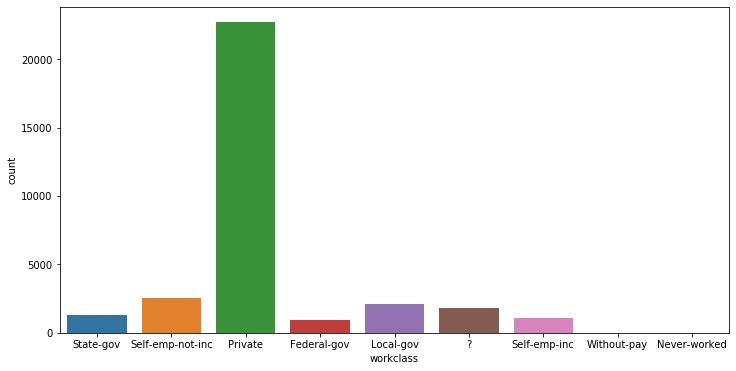

In [106]:
plt.figure(figsize=(12,6))
sns.countplot(x='workclass', data=df)

7) Какой средний возраст женщин и мужчин? (1 балл)

In [102]:
df.groupby('sex')['age',].mean()

,age
sex,
Female,36.858230
Male,39.433547


8) Постройте гистограмму(bar) распределения образования людей (education) (2 балла)

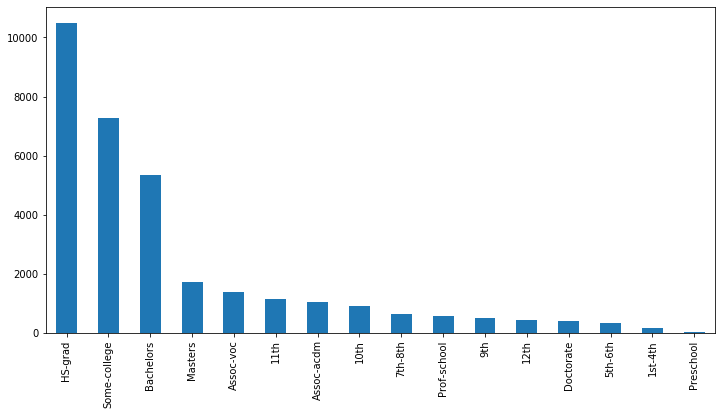

In [107]:
plt.figure(figsize=(12,6))
df['education'].value_counts().plot(kind='bar');

## Часть 2 (18 баллов)

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год? (2 балла)

*признака "salary" нет в выборке, я полагаю, что вместо него "income"

In [68]:
import numpy as np

In [77]:
df.groupby('income')['age'].agg([np.mean,np.std])

,mean,std
income,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate) (2 балла)

Создам признак, указывающий на высшее образование:

In [23]:
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

In [35]:
df['higher.education'] = df['education'].apply(lambda x: 1 if x in higher_education else 0)

In [110]:
df.groupby('income')['higher.education'].value_counts(normalize=True)

income  higher.education
<=50K   0                   0.75805
        1                   0.24195
>50K    1                   0.57837
        0                   0.42163
Name: higher.education, dtype: float64

Ответ: Нет, люди и без высшего образованию получают более 50К, причем их не сольно меньше (42%) чем людей с высшим образованием.

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми. (2 балла)

In [43]:
#Создам новый признак
df['is.married']= df['marital.status'].apply(lambda x: x.startswith('Married')).astype(int);

In [111]:
df[df['income']=='>50K']['is.married'].value_counts(normalize=True)

1    0.859074
0    0.140926
Name: is.married, dtype: float64

Ответ: среди зарабатывающих много больше всего женатых, причем значительно (86%)

12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country). (3 балла)

In [28]:
df.groupby(['income','native.country'])['hours.per.week'].mean()

income  native.country 
<=50K   ?                  40.164760
        Cambodia           41.416667
        Canada             37.914634
        China              37.381818
        Columbia           38.684211
                             ...    
>50K    Thailand           58.333333
        Trinadad&Tobago    40.000000
        United-States      45.505369
        Vietnam            39.200000
        Yugoslavia         49.500000
Name: hours.per.week, Length: 82, dtype: float64

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам. (4 балла)

Иначе говоря, нужно разбить множество всех значений на куски (классы) и вместо конкретного значения оставлять на месте числа имя (в данном случае номер) класса. Выглядеть это должно как-то так:


```
10000 -> 13
  650 -> 9
  450 -> 9
  404 -> 9
 1000 -> 10
   26 -> 5 
 5000 -> 12
    1 -> 0
```



14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще. (2 балла)

In [29]:
df[(df['sex'] == 'Female') & (df['income'] == '>50K')]['native.country'].value_counts()

United-States         1072
?                       17
Philippines             12
Canada                   9
Germany                  7
England                  6
Italy                    5
Japan                    5
China                    5
Taiwan                   4
France                   3
South                    3
Cuba                     3
Dominican-Republic       2
India                    2
Iran                     2
Portugal                 2
Poland                   2
Mexico                   2
Puerto-Rico              2
Ireland                  1
Thailand                 1
Nicaragua                1
Vietnam                  1
Yugoslavia               1
Hungary                  1
El-Salvador              1
Haiti                    1
Jamaica                  1
Greece                   1
Laos                     1
Honduras                 1
Scotland                 1
Hong                     1
Name: native.country, dtype: int64

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary (3 балла)

In [30]:
from random import randint

In [31]:
#Создам признак "зарплата"
df['magic.salary'] = df['income'].apply(lambda x: randint(0,50) if x == '<=50K' else randint(51,200))

In [54]:
#Создам признак "зароботок в час"
df['magic.salary.per.hour'] = df['magic.salary'] / df['hours.per.week']

In [66]:
df.groupby('education')[['magic.salary.per.hour']].mean().sort_values(by='magic.salary.per.hour',ascending=False)

,magic.salary.per.hour
education,
Doctorate,2.523192
Prof-school,2.323491
Masters,2.199565
Bachelors,1.684878
Assoc-acdm,1.482543
Assoc-voc,1.394233
Some-college,1.276858
HS-grad,1.128597
10th,1.112152
